# Visualizations of COVID data by region
### Might do predictions/regressions later idk


In [286]:
#%%debug
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np 
import pandas as pd

In [287]:
# All confirmed cases
path_cases = "./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
all_cases_df = pd.read_csv(path_cases, header=0)

# Recovered cases
path_recovered = "./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
recovered_df = pd.read_csv(path_recovered, header=0)

path_out = "./graphs/"

# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 32
dates = all_cases_df.columns[start_date_idx:-1]

# Subtract recovered from all cases to get active cases
active_cases_df = all_cases_df
active_cases_df[dates] = active_cases_df[dates].sub(recovered_df[dates])

# Get num_regions with most cases on date 
# num_regions = 50
# highest_regions = all_cases_df.nlargest(num_regions, date)

print(active_cases_df.head())

  Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand  15.0000  101.0000        2        3        5   
1            NaN          Japan  36.0000  138.0000        2        1        2   
2            NaN      Singapore   1.2833  103.8333        0        1        3   
3            NaN          Nepal  28.1667   84.2500        0        0        0   
4            NaN       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/14/20  3/15/20  3/16/20  3/17/20  \
0        7        8        8  ...       47       79      112      136   
1        2        4        4  ...      655      721      681      734   
2        3        4        5  ...      107      121      134      152   
3        1        1        1  ...        0        0        0        0   
4        3        4        4  ...      203      386      524      624   

   3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  
0      170      

In [288]:
# Plot regions (each region is a subplot)
def plot_place(df, column, dates, ylabel="Cases", title="Regions"):
    fig, ax = plt.subplots(figsize=(20, 10)) 
    for region in df[column]:
        region_data = df.loc[lambda c: df[column] == region, dates]
        ax.plot(dates, 
                region_data.transpose(),
                label=region)
        loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
        ax.xaxis.set_major_locator(loc)
        ax.set(xlabel='Date', ylabel=ylabel)
    plt.legend(loc="upper left")
    fig.savefig("{}{}_{}_{}".format(
        path_out, title, dates[0].replace("/", "-"), dates[-1].replace("/", "-"))
    )
    plt.show()

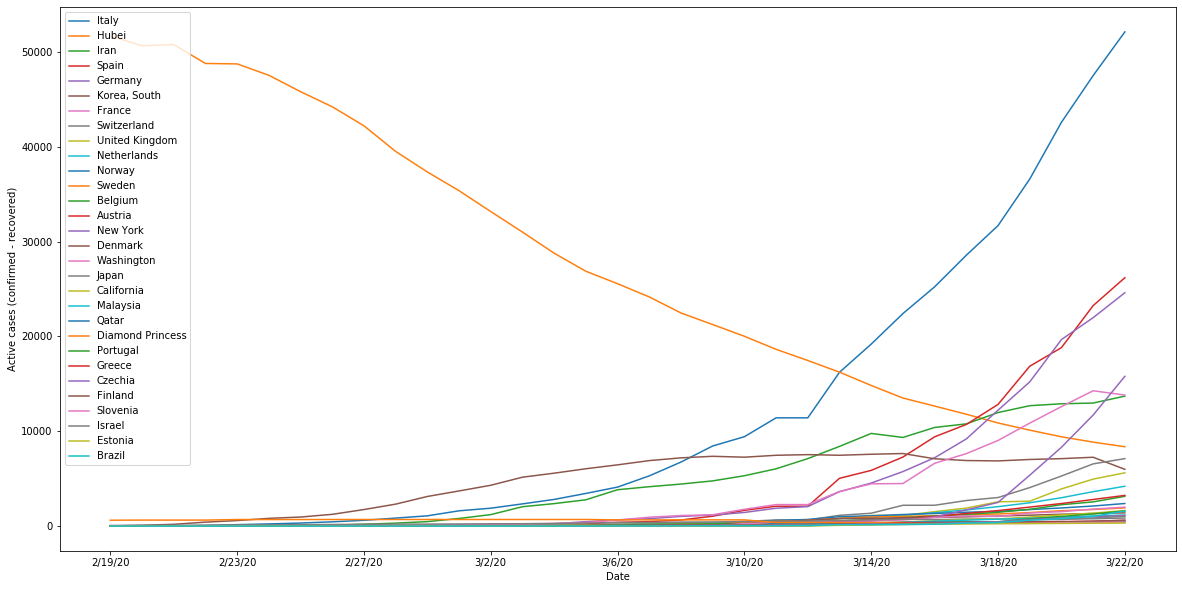

In [289]:
# Fill in any missing Province/State with country
countries_states = active_cases_df.copy()
countries_states["Province/State"].fillna(cases_df["Country/Region"], inplace=True) 

# Show regions with highest number of cases 1 week ago
num_regions = 30
countries_states = countries_states.nlargest(num_regions, dates[-7])

# Plot countries/provinces in selected range
plot_place(countries_states, 
           "Province/State", 
           dates, 
           ylabel="Active cases (confirmed - recovered)", 
           title="Active-Countries-and-States")

KeyError: 'Country/Region'

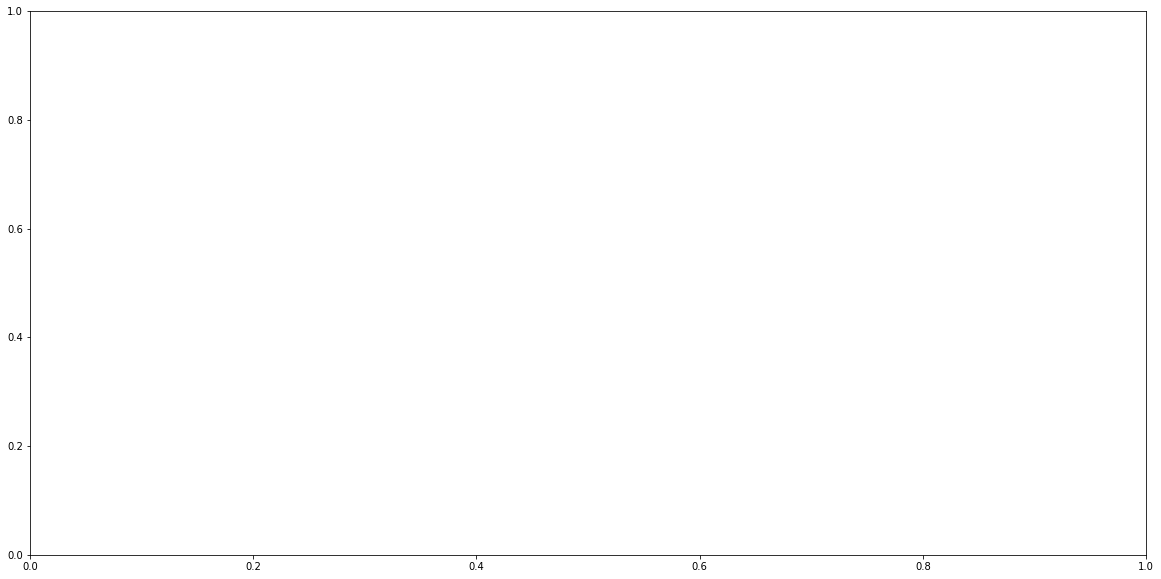

In [290]:
countries_df = cases_df.groupby('Country/Region').sum()#.aggregate(np.sum)
countries_df.head()
plot_place(countries_df, 'Country/Region', dates)


loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set(xlabel='Date', ylabel='Confirmed cases (- recovered)')
plt.legend(loc="upper left")
fig.savefig("graphs/countries.png")
plt.show()